## Setup

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Exercises Datasets"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [22]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)



## Load

Escolha alguns datasets, à seu critério, para trabalhar.

In [23]:
df1 = pd.read_pickle(f"{ROOT}/data/hyperplane.pickle")
df2 = pd.read_pickle(f"{ROOT}/data/spiral.pickle")
df3 = pd.read_pickle(f"{ROOT}/data/supernova.pickle")

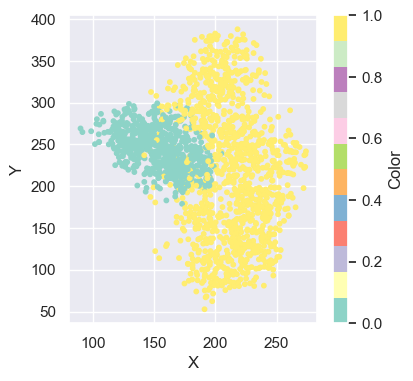

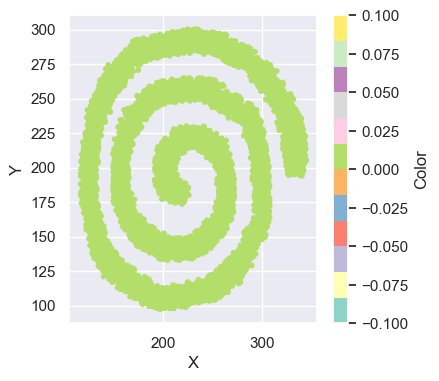

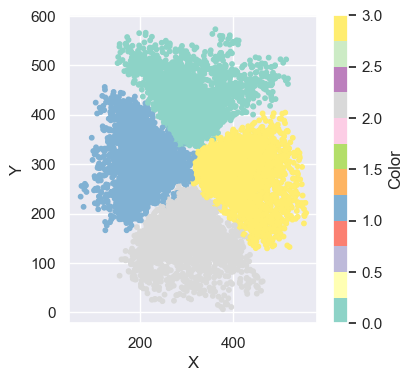

In [24]:
plt.figure(figsize=(4, 4))
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df2['x'], df2['y'], c=df2['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df3['x'], df3['y'], c=df3['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

## Pre-Processing

In [25]:
df1_kmeans = df1.copy()
df2_kmeans = df2.copy()
df3_kmeans = df3.copy()

In [26]:
df1_kmeans.drop(['color'], axis = 1, inplace =True)
df2_kmeans.drop(['color'], axis = 1, inplace =True)
df3_kmeans.drop(['color'], axis = 1, inplace =True)

## Elbow

Nesses datasets nós já temos os Clusters ideais, então fica facultativo usar o Elbow ou outro método para definição do K.

Você pode contar quantas cores/clusters o dataset possui. 


pickle:
Index(['x', 'y', 'color'], dtype='object')
            x           y  color
0  237.491363  136.898504      1
1  180.470910  202.233104      0
2  213.905287  310.329493      1
3  183.713515  172.680302      1
4  244.125483  214.833692      1

spiral:
Index(['x', 'y', 'color'], dtype='object')
            x           y  color
0  323.857377  225.428102      0
1  146.978425  257.287542      0
2  261.374770  253.624468      0
3  157.372865  162.127028      0
4  118.678976  188.888146      0

supernova:
Index(['x', 'y', 'color'], dtype='object')
            x           y  color
0  202.207191  333.390000      1
1  214.424501  374.531029      1
2  476.317977  255.623373      3
3  237.659471  148.173931      2
4  201.959301  355.790748      1
Númeo de clusters: 2


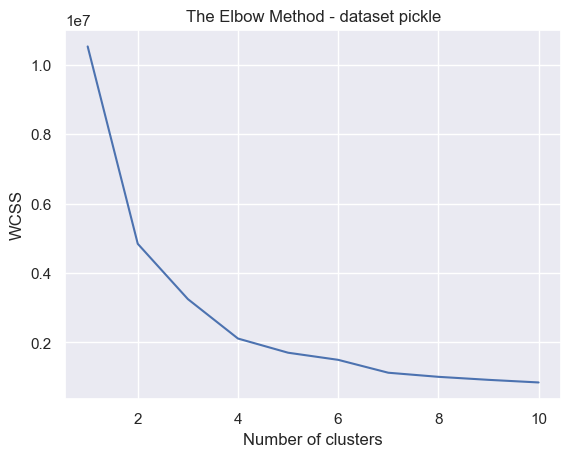

Númeo de clusters: 1


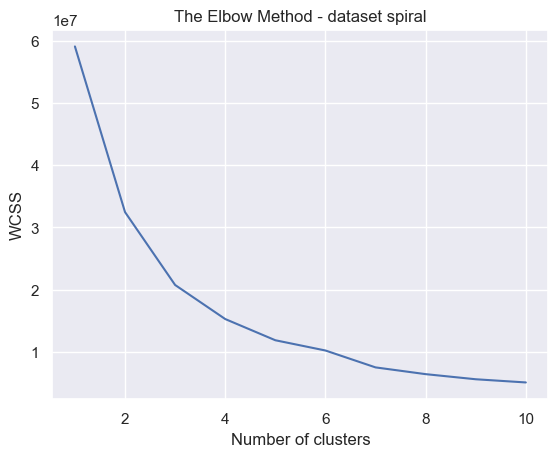

Númeo de clusters: 4


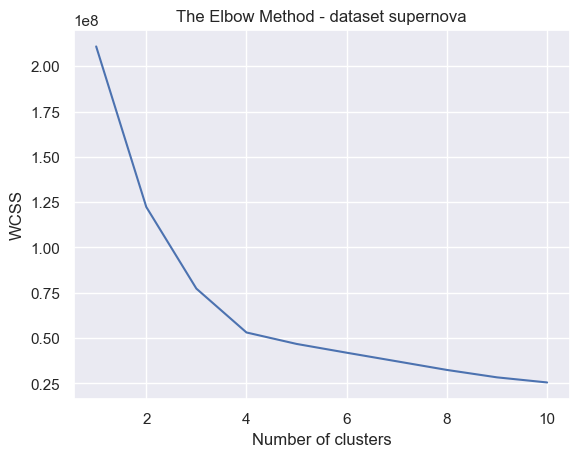

In [27]:
from sklearn.cluster import KMeans

print('\npickle:')
print(df1.columns)
print(df1.head())

print('\nspiral:')
print(df2.columns)
print(df2.head())

print('\nsupernova:')
print(df3.columns)
print(df3.head())

def cotovelo(dataframe, title):
    wcss = []
    
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(dataframe)
        wcss.append(kmeans.inertia_)
        
    print(f'Númeo de clusters: { dataframe['color'].nunique()}')

    plt.plot(range(1, 11), wcss)
    plt.title(f'The Elbow Method - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

cotovelo(df1, 'dataset pickle')
cotovelo(df2, 'dataset spiral')
cotovelo(df3, 'dataset supernova')

## Models

Vimos em aula o Kmeans

Tente também implementar os outros metodos e compare os resultados fazendo o plot do df_original (com as cores dos clusters ideais) e ao lado o plot com os clusters dos modelos

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

print(df1.columns)



Index(['x', 'y', 'color'], dtype='object')


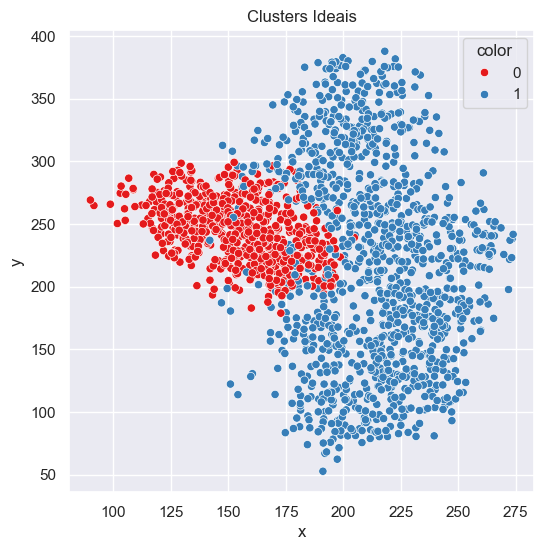

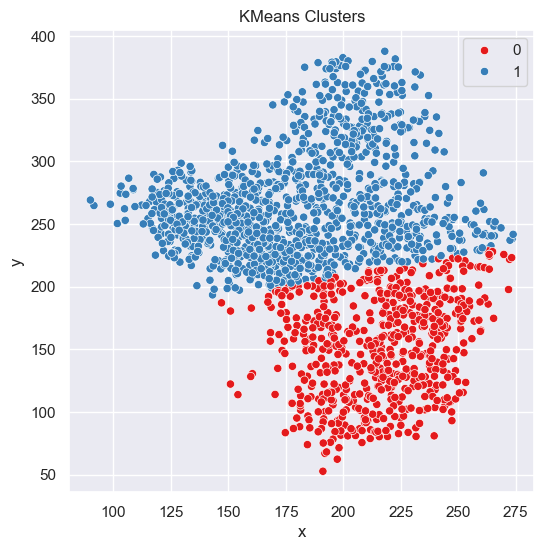

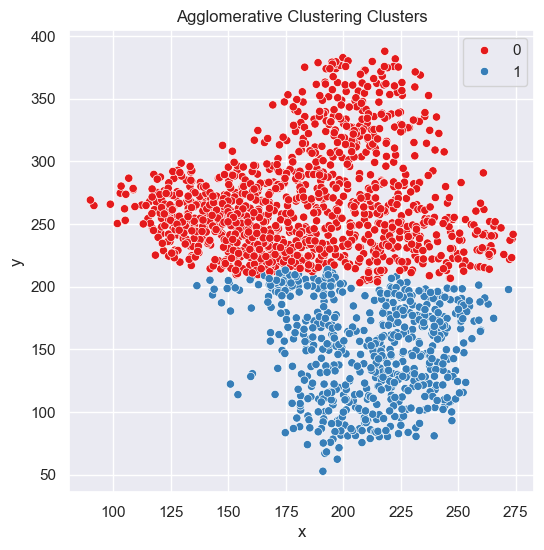

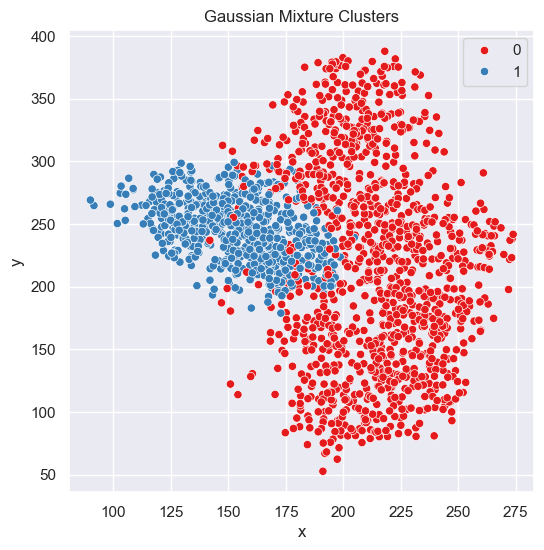

In [29]:
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
kmeans_clusters = kmeans.fit_predict(df1)


agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_clusters = agglo.fit_predict(df1)

gmm = GaussianMixture(n_components=n_clusters, random_state=SEED)
gmm_clusters = gmm.fit_predict(df1)



def plot_clusters(data, labels, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette='Set1', legend='full')
    plt.title(title)
    plt.show()


plot_clusters(df1, df1['color'], 'Clusters Ideais')


plot_clusters(df1, kmeans_clusters, 'KMeans Clusters')


plot_clusters(df1, agglo_clusters, 'Agglomerative Clustering Clusters')


plot_clusters(df1, gmm_clusters, 'Gaussian Mixture Clusters')



In [30]:
from sklearn.metrics import silhouette_score

# Silhouette score para cada método
kmeans_score = silhouette_score(df1, kmeans_clusters)
agglo_score = silhouette_score(df1, agglo_clusters)
gmm_score = silhouette_score(df1, gmm_clusters)

print(f"KMeans Silhouette Score: {kmeans_score}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_score}")
print(f"Gaussian Mixture Silhouette Score: {gmm_score}")


KMeans Silhouette Score: 0.47360953900000896
Agglomerative Clustering Silhouette Score: 0.455723304975095
Gaussian Mixture Silhouette Score: 0.2092145918124163


## Results

Comente sobre a performance das diferentes técnicas

### Qual é o propósito principal de usar técnicas de clustering em aprendizado de máquina?

O clustering agrupa dados não rotulados em grupos (clusters) de itens similares, ajudando a identificar padrões e estrutura nos dados.

### Quais são algumas das métricas comuns usadas para avaliar a qualidade de um cluster?


Métricas como Silhouette Score (avalia a coesão e separação dos clusters), Davies-Bouldin Index (mede a razão entre distâncias intra e inter-cluster), e Inertia (soma das distâncias aos centros dos clusters) são usadas para avaliar a qualidade dos clusters.

### Como você decide o número ideal de clusters a serem usados em um determinado conjunto de dados?

Métodos como o "Método do Cotovelo" (analisa a variação da inércia) e o "Silhouette Score" (mede a qualidade dos clusters) ajudam a determinar o número ideal de clusters.

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#2.-Set-up